# EMA-LABELLING-ML_EXPERIMENTS_DIFFERENT-THRESOLDS (Random Forest_ 6 classes)

In [1]:
'''Import libraries'''
import mat73
import numpy as np
import seaborn as sns
from numpy import where
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import sklearn
from numpy import argmax
from sklearn.metrics import (roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc,roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,balanced_accuracy_score)
from imblearn.under_sampling import RandomUnderSampler

In [2]:
'''Usefull fuctions'''

'''Load data'''
def load_EMA_data(data='Preprocessed data//PREPROCESED_CAPTURE24_ALL_DATA_EMA_LABELED_THRES_0_AP_V3.mat'):
    fileName = data
    mat = mat73.loadmat(fileName)#load v73 matlab files
    data_X = mat['data']['data_AP']
    label_y = mat['data']['label_EMA']
    label_AP = mat['data']['label_AP']
    idLOSO = mat['data']['id']
    return (data_X,label_y,idLOSO,label_AP)

'''Training-test_data selection'''
def train_val_test(idx):
    trainset= [1101, 1102, 1103, 1105, 1106, 1107, 1108, 1109, 1112, 1113, 1114, 1115,
     1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128,
     1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140,
     1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1154, 1157,
     1159, 1160, 1161, 1162, 1163, 1164, 1165, 1167, 1168, 1169, 1171, 1172,
     1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184,
     1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198,
     1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210,
     1211, 1213, 1214, 1217, 1218, 1219, 1222, 1268, 1277, 2101, 2103, 2104,
     2105, 2106, 2107, 2109, 2110, 2111, 2113, 2114, 2117, 2118, 2119, 2120,
     2121, 2122, 2123, 2124, 2125, 2126, 2128, 2129, 2132, 2133, 2135, 2136,
     2137, 2138, 2139, 2140, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150,
     2152, 2153, 2154, 2155, 2156, 2158, 2159, 2160, 2161, 2162, 2163, 2164,
     2165, 2166, 2168, 2169, 2175, 2177, 2178, 2179, 2180, 2181, 2182, 2183,
     2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195,
     2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207,
     2208, 2209, 2210, 2211, 2212, 2213, 2215, 2216, 2217, 2218, 2219, 2220,
     2221, 2222, 2223, 2224, 2228, 2259, 2260, 2262, 2264, 3101, 3102, 3103,
     3104, 3105, 3106, 3107, 3108, 3110, 3111, 3112, 3113, 3114, 3115, 3116,
     3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129,
     3132, 3133, 3134, 3136, 3138, 3139, 3141, 3142, 3143, 3144, 3145, 3146,
     3147, 3148, 3150, 3151, 3152, 3153, 3154, 3156, 3157, 3158, 3159, 3160,
     3161, 3162, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3173, 3174,
     3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186,
     3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3197, 3198, 3199, 3200,
     3201, 3203, 3204, 3206, 3207, 3208, 3216, 3217, 3218, 3221, 3229, 3241,
     3248, 3249, 3250, 3254, 3255, 4101, 4102, 4103, 4104, 4106, 4107, 4108,
     4109, 4110, 4112, 4113, 4115, 4116, 4118, 4119, 4122, 4123, 4124, 4125,
     4127, 4128, 4129, 4130, 4131, 4132, 4134, 4135, 4136, 4137, 4138, 4139,
     4141, 4142, 4143, 4144, 4145, 4146, 4147, 4149, 4150, 4151, 4153, 4154,
     4155, 4157, 4159, 4160, 4161, 4162, 4163, 4190, 4451, 4452, 4453, 4455,
     4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467,
     4468, 4469, 4470, 4471, 4472, 4473, 4475, 4476, 4477, 4478, 4480, 4484,
     4485, 4486, 4487, 4488, 4494, 4495, 4496, 4497, 4498, 4499, 4506, 4507]
    testset = [1104, 1110, 1212, 1220, 1221, 1223, 1224, 1227, 1229, 1232, 1233, 1234,
     1236, 1237, 1238, 1239, 1240, 1241, 1242, 1244, 1247, 1249, 1250, 1251,
     1252, 1253, 1254, 1256, 1257, 1258, 1260, 1261, 1263, 1264, 1265, 1266,
     1267, 1269, 1271, 1272, 1273, 1276, 1279, 1280, 1281, 1282, 2108, 2170,
     2171, 2173, 2174, 2225, 2226, 2227, 2229, 2230, 2231, 2232, 2233, 2234,
     2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246,
     2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2257, 2258, 2265,
     2266, 2267, 2268, 2269, 2270, 3137, 3172, 3205, 3209, 3210, 3211, 3212,
     3213, 3219, 3220, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3230, 3231,
     3234, 3235, 3237, 3238, 3239, 3242, 3243, 3244, 3245, 3246, 3247, 3251,
     3252, 3253, 3256, 4114, 4140, 4164, 4165, 4166, 4167, 4168, 4171, 4174,
     4175, 4178, 4179, 4181, 4182, 4183, 4184, 4185, 4187, 4188, 4189, 4192,
     4193, 4195, 4481, 4482, 4500, 4501, 4502, 4503, 4504, 4505, 4508, 4509,
     4510, 4511, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522,
     4523, 4524, 4525, 4526, 4527, 4528]
    
    trainInd,testInd = [],[]
    for subject in trainset:
        ind = where(idx == subject)
        trainInd.append(ind[0])
    trainInd = np.concatenate(trainInd,axis=0)
    for subject in testset:
        ind = where(idx == subject)
        testInd.append(ind[0])
    testInd = np.concatenate(testInd,axis=0)
    return trainInd,testInd

def multilabel_selector(index_array, selected_ids):
    res = []
    for currentindex in selected_ids:
        ind = np.where(index_array == currentindex)
        res.append(ind[0])
    selectecIndexes = np.concatenate(res,axis=0)
    selectecIndexes = np.sort(selectecIndexes)#sort list to preserve idx order
    return selectecIndexes

def clf_multi_to_predict_proba(y_predict_train):
    y_predict_train=np.array(y_predict_train)
    y_predict_train=y_predict_train[:,:,1]#get column 1(positive prediction)
    y_predict_train=np.transpose(y_predict_train)#swap axis
    return y_predict_train

def metricsOnSubsets_multiclass(model,X_train, y_train, dataTest, labelTest):
    '''Evaluate Performance'''
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    print('\nTRAIN')
    print(X_train.shape)
    y_predict_train = model.predict_proba(X_train)
    y_predict_train=clf_multi_to_predict_proba(y_predict_train)
    results_train=performance_evaluation_multiclass(y_train,y_predict_train,color="Blues")
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")
    print('\nTEST')
    y_predict_test = model.predict_proba(dataTest)
    y_predict_test=clf_multi_to_predict_proba(y_predict_test)
    results_test = performance_evaluation_multiclass(labelTest,y_predict_test,color="Oranges")
    results_metrics= {'Train':results_train , 'Test': results_test}
    return results_metrics

def plotNomalizedConfMatrix(y_test, y_pred, labels=['0','1','2','3','4','6','8'],color='Blues'):
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_df = pd.DataFrame(cm, index = labels, columns = labels)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_df, annot=True,cmap=color,fmt='.0%',cbar=False,annot_kws={'size': 12})
    plt.ylabel('True label',fontsize=12)
    plt.xlabel('Prediction',fontsize=12)
    plt.xticks(fontsize=12,rotation=45)
    plt.yticks(fontsize=12,rotation=0) 
    plt.show()

def performance_evaluation_multiclass(y_test,y_predict_prob,color='Blues', cf_plot=False):
    multiclass_AUC=roc_auc_score(y_test, y_predict_prob, multi_class='ovr')#Ejecute before argmax
    y_pred=np.argmax(y_predict_prob, axis=1)
    y_test=np.argmax(y_test, axis=1)
    balanced_accuracy=balanced_accuracy_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    metricas=precision_recall_fscore_support(y_test, y_pred, average='macro')
    precision, recall=metricas[0],metricas[1]
    f1=f1_score(y_test, y_pred, average='macro')
    print('balanced_accuracy_score: '+ str(round(100*(balanced_accuracy),2))+"%"+"\n")
    print('Precision: ', precision)
    print('Recall', recall)
    print('Fscore', f1)
    print('Multiclass_AUC: '+ str(multiclass_AUC))       
    results=[balanced_accuracy,precision,recall,f1,multiclass_AUC]
    if cf_plot:
        try:
            plotNomalizedConfMatrix(y_test, y_pred,labels=['Sitting','Standing','Walking','Jogging','Sports','Cycling'],color=color)
        except:
            print("PLOT ERROR")
    return results
    
def printLabel_distribution(y, plot_title="Class distribution", label_map=None):
    df = pd.DataFrame(y)
    count_classes = df[0].value_counts().sort_index()
    # If a label map is provided, apply it to the index (class labels)
    if label_map:
        count_classes.index = count_classes.index.map(label_map)
    count_classes.plot(kind='bar', rot=0)
    plt.title(plot_title)
    plt.xlabel("Physical activity")
    plt.ylabel("Number of observations")
    plt.show()
    
def trainModel_ML(X_train, y_train, ramdomState=0):
    model = RandomForestClassifier(n_estimators=150, max_depth=10, max_features=16,
                                   class_weight="balanced", oob_score=True, random_state=ramdomState) #
    model.fit(X_train, y_train)
    val_accuracy=model.score(X_train,y_train)
    return model,val_accuracy

def to_categorical(y, num_classes=None):
    y = np.array(y, dtype='int')
    if not num_classes:
        num_classes = np.max(y) + 1
    return np.eye(num_classes)[y]

def undersample_index(y):
    undersample = RandomUnderSampler(random_state=42)
    _,_ = undersample.fit_resample(y, y)
    idx=undersample.sample_indices_
    return idx

### Holdout repeatedTest

In [3]:
def holdout_repeatedTest(X_train, y_train, X_test, y_test,repeated_tests=3):
    results_train=np.zeros((repeated_tests,5))
    results_test=np.zeros((repeated_tests,5))
    '''Main loop'''
    for i in range(repeated_tests):
        print("---------------------------------------------------------------")
        print("---------------------------------------------------------------")
        print(i)
        model, val_metrics = trainModel_ML(X_train, y_train,ramdomState=(5+i))
        print(f'Accuracy : {val_metrics}')
        results_metrics=metricsOnSubsets_multiclass(model,X_train, y_train, X_test, y_test)
        results_train[i]=results_metrics['Train']
        results_test[i]=results_metrics['Test']
    mainresults={'Train': results_train, 'Test': results_test}
    return mainresults,model

In [4]:
import pandas as pd
def printsummary_Results(results_np_matrix,print_mean=True):
    df = pd.DataFrame(results_np_matrix,columns=['Accuracy', 'Precision','Recall','Fscore','AUC',])
    summary_mean=df.mean()
    summary_std=df.std()
    if print_mean==True:
        res=summary_mean
    else:
        res=summary_std
    df=res.to_frame().T
    df = df.reset_index(drop=True)
    return df

### DATA SELECTION AND SPLITING 

In [5]:
def format_data(X,y,idLOSO, selected_ids=[0,1,2,4,6,8]):
    X=np.nan_to_num(X, nan=0)
    null_mask=~np.isnan(X).any(axis=1) # null mask#DELETE ROWS WITH NULL VALUES
    X=X[null_mask]
    y=y[null_mask]
    idLOSO=idLOSO[null_mask]
    y_mask=multilabel_selector(index_array=y, selected_ids=selected_ids)#Select specific classes
    X, y , idLOSO = X[y_mask,:], y[y_mask],idLOSO[y_mask] #Apply mask
    #Reassign label number before one-hot encoding
    y[y == 4] = 3 #Running
    y[y == 6] = 4 #Sports
    y[y == 8] = 5 #Cycling
    printLabel_distribution(y, plot_title="Original data distribution",label_map = {0: 'Sitting', 1: 'Standing', 2: 'Walking',3: 'Running', 4: 'Sports', 5: 'Cycling'})
    y = to_categorical(y)#one-hot encoding
    trainIdx,testIdx = train_val_test(idLOSO)
    X_train, y_train,loso_train = X[trainIdx,:], y[trainIdx,:], idLOSO[trainIdx] 
    X_test, y_test, loso_test = X[testIdx,:], y[testIdx,:], idLOSO[testIdx]
    print("Train set unique participants: ", len(np.unique(loso_train)))
    print("Test set unique participants: ", len(np.unique(loso_test)))
    print("X_train_shape: ", X_train.shape)
    print("X_test_shape: ", X_test.shape)
    return X_train, y_train, X_test, y_test

## TEST AND EVALUATION

In [6]:
def run_train_and_test(data):
    '''Load and define training, and test data'''
    X,y,idLOSO,_= load_EMA_data(data)#
    X_train, y_train, X_test, y_test=format_data(X,y,idLOSO,selected_ids=[0,1,2,4,6,8])
    '''RandomUnderSampler on TRAIN'''
    under_idx=undersample_index(y_train)
    X_train, y_train=X_train[under_idx], y_train[under_idx]
    print("X_train_undersampled_shape: ", X_train.shape)
    printLabel_distribution(argmax(y_train, axis=1), plot_title="Undersampled data distribution (Train set)", label_map = {0: 'Sitting', 1: 'Standing', 2: 'Walking',3: 'Running', 4: 'Sports', 5: 'Cycling'} )
    '''Holdout Repeated test'''
    main_results_repeated,model =holdout_repeatedTest(X_train, y_train, X_test, y_test,repeated_tests=3)
    '''Summary of Results'''
    print('Main results (average of 3 iterations)')
    df1=printsummary_Results(main_results_repeated['Train'],print_mean=True)
    df1['Data'] = 'Train'
    df2=printsummary_Results(main_results_repeated['Test'],print_mean=True)
    df2['Data'] = 'Test'
    dfRes=pd.concat([df1, df2])
    dfRes = dfRes[['Data'] + [col for col in dfRes.columns if col != 'Data']]
    dfRes = dfRes.style.hide(axis='index')
    return dfRes

# RUN EXPERIMENTS:

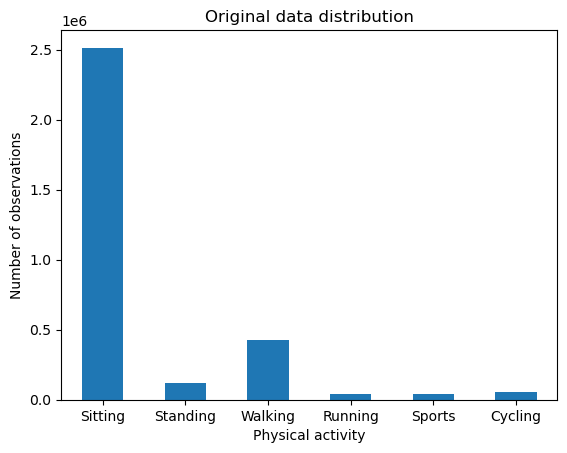

Train set unique participants:  408
Test set unique participants:  174
X_train_shape:  (2209980, 40)
X_test_shape:  (950760, 40)
X_train_undersampled_shape:  (135840, 40)


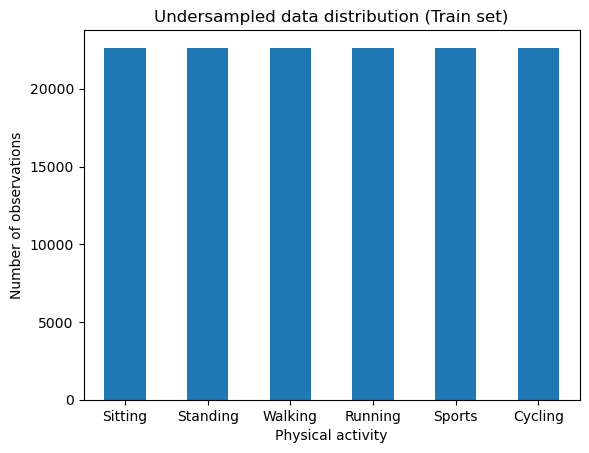

---------------------------------------------------------------
---------------------------------------------------------------
0
Accuracy : 0.40304034157832747
---------------------------------------------------------------
---------------------------------------------------------------

TRAIN
(135840, 40)
[[19635   609  1329   163   624   280]
 [ 9388 11831   555    14   796    56]
 [ 2945  1857 15218   304  1944   372]
 [ 1844  1122  7090 11115  1294   175]
 [ 1513  1232  5159  1355 12719   662]
 [ 2402  1233  3209   641  1738 13417]]
              precision    recall  f1-score   support

           0       0.52      0.87      0.65     22640
           1       0.66      0.52      0.58     22640
           2       0.47      0.67      0.55     22640
           3       0.82      0.49      0.61     22640
           4       0.67      0.56      0.61     22640
           5       0.90      0.59      0.71     22640

    accuracy                           0.62    135840
   macro avg       0.6

In [7]:
#Train and evaluate using 0% Threshold dataset
dfRes_0=run_train_and_test('Preprocessed data//PREPROCESED_CAPTURE24_ALL_DATA_EMA_LABELED_THRES_0_AP_V3.mat')

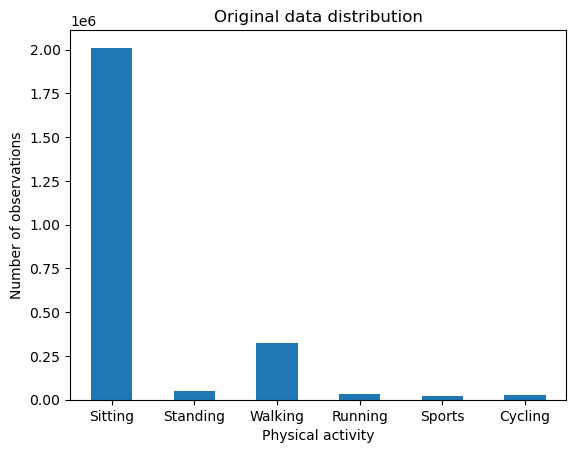

Train set unique participants:  406
Test set unique participants:  172
X_train_shape:  (1726040, 40)
X_test_shape:  (724760, 40)
X_train_undersampled_shape:  (76920, 40)


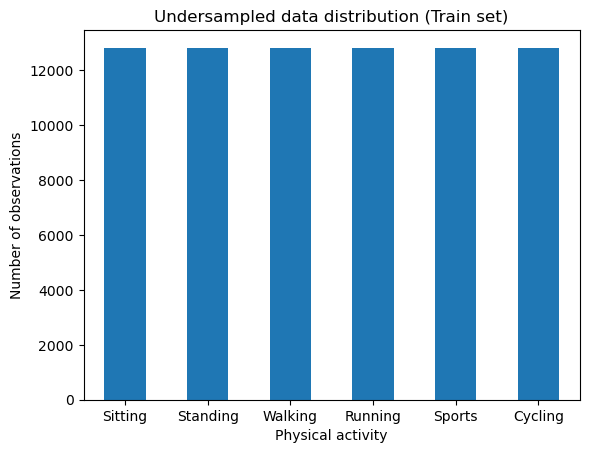

---------------------------------------------------------------
---------------------------------------------------------------
0
Accuracy : 0.6453978159126365
---------------------------------------------------------------
---------------------------------------------------------------

TRAIN
(76920, 40)
[[12646   119    17     0    27    11]
 [  309 12131   184     0   166    30]
 [  194  1375  9874   194  1115    68]
 [  153   811  4524  6619   647    66]
 [  144  1040  3967  1288  5888   493]
 [   63   527   353    11   398 11468]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12820
           1       0.76      0.95      0.84     12820
           2       0.52      0.77      0.62     12820
           3       0.82      0.52      0.63     12820
           4       0.71      0.46      0.56     12820
           5       0.94      0.89      0.92     12820

    accuracy                           0.76     76920
   macro avg       0.78 

In [8]:
#Train and evaluate using 50% Threshold dataset
dfRes_50=run_train_and_test('Preprocessed data//PREPROCESED_CAPTURE24_ALL_DATA_EMA_LABELED_THRES_0.5_AP_V3.mat')

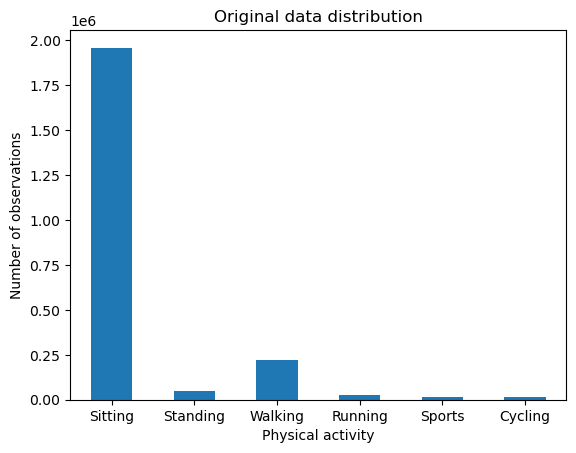

Train set unique participants:  404
Test set unique participants:  172
X_train_shape:  (1601940, 40)
X_test_shape:  (673320, 40)
X_train_undersampled_shape:  (54600, 40)


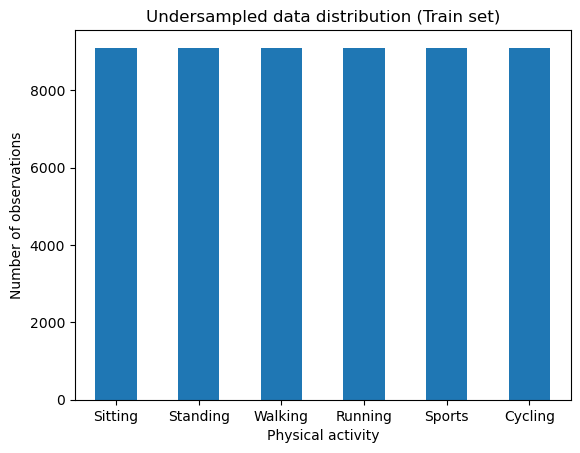

---------------------------------------------------------------
---------------------------------------------------------------
0
Accuracy : 0.7405128205128205
---------------------------------------------------------------
---------------------------------------------------------------

TRAIN
(54600, 40)
[[9032   36    7    0   18    7]
 [  74 8860   45    0  105   16]
 [  53  620 7733  133  527   34]
 [  26  323 3225 5217  290   19]
 [  55  419 2676 1040 4590  320]
 [   9  203   85    0  160 8643]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9100
           1       0.85      0.97      0.91      9100
           2       0.56      0.85      0.68      9100
           3       0.82      0.57      0.67      9100
           4       0.81      0.50      0.62      9100
           5       0.96      0.95      0.95      9100

    accuracy                           0.81     54600
   macro avg       0.83      0.81      0.80     54600
weight

In [9]:
#Train and evaluate using 75% Threshold dataset
dfRes_75=run_train_and_test('Preprocessed data//PREPROCESED_CAPTURE24_ALL_DATA_EMA_LABELED_THRES_0.75_AP_V3.mat')

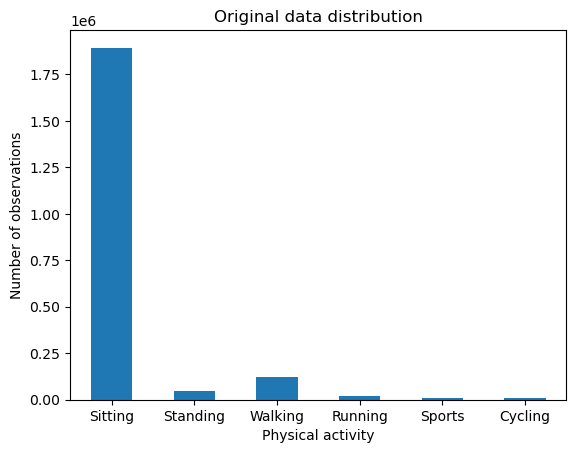

Train set unique participants:  403
Test set unique participants:  171
X_train_shape:  (1470800, 40)
X_test_shape:  (615120, 40)
X_train_undersampled_shape:  (36600, 40)


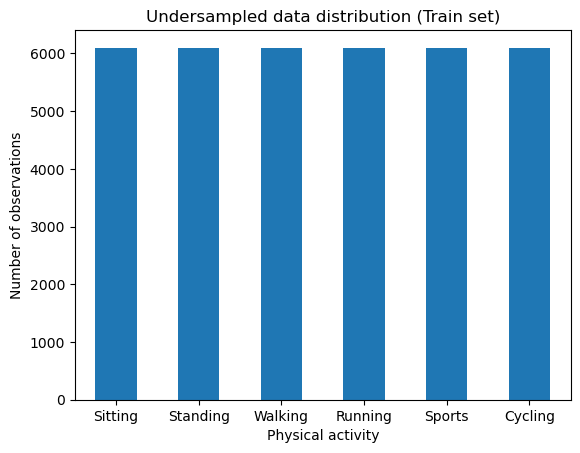

---------------------------------------------------------------
---------------------------------------------------------------
0
Accuracy : 0.8087158469945355
---------------------------------------------------------------
---------------------------------------------------------------

TRAIN
(36600, 40)
[[6069   19    7    0    3    2]
 [   6 6047   25    0   16    6]
 [   3  131 5715  121  127    3]
 [   5   72 2054 3870   98    1]
 [   0   90 1517  676 3741   76]
 [   2   39   37    0   47 5975]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6100
           1       0.95      0.99      0.97      6100
           2       0.61      0.94      0.74      6100
           3       0.83      0.63      0.72      6100
           4       0.93      0.61      0.74      6100
           5       0.99      0.98      0.98      6100

    accuracy                           0.86     36600
   macro avg       0.88      0.86      0.86     36600
weight

In [10]:
#Train and evaluate using 90% Threshold dataset
dfRes_90=run_train_and_test('Preprocessed data//PREPROCESED_CAPTURE24_ALL_DATA_EMA_LABELED_THRES_0.9_AP_V3.mat')

In [11]:
#Results at 0% Threshold
dfRes_0

Data,Accuracy,Precision,Recall,Fscore,AUC
Train,0.619685,0.673006,0.619685,0.622208,0.901877
Test,0.499310,0.416015,0.499310,0.440809,0.817201


In [12]:
#Results at 50% Threshold
dfRes_50

Data,Accuracy,Precision,Recall,Fscore,AUC
Train,0.762359,0.781682,0.762359,0.756032,0.951018
Test,0.702002,0.583087,0.702002,0.613119,0.963345


In [13]:
#Results at 75% Threshold
dfRes_75

Data,Accuracy,Precision,Recall,Fscore,AUC
Train,0.808107,0.828175,0.808107,0.803328,0.966814
Test,0.722050,0.608337,0.722050,0.645660,0.971981


In [14]:
#Results at 90% Threshold
dfRes_90

Data,Accuracy,Precision,Recall,Fscore,AUC
Train,0.859226,0.883338,0.859226,0.858114,0.979675
Test,0.736061,0.635459,0.736061,0.668939,0.975135
